# 6.6 Sourcing & Analyzing Time-Series Data

### This script contains the following:

#### 1. Importing your libraries and data
#### 2. Subsetting, wrangling, and cleaning time-series data
#### 3. Time series analysis: decomposition
#### 4. Testing for stationarity
#### 5. Stationarizing the data

### 1. Importing your libraries and data

#### Importing libraries and data

Before you start this analysis, you'll need a new library you haven't installed before—Quandl. Install Quandl using conda:

`conda install quandl`

In [2]:
import sys
print(sys.executable)

C:\ProgramData\anaconda4\python.exe


In [3]:
pip install --user quandl


Note: you may need to restart the kernel to use updated packages.


In [4]:
pip list

Package                           Version
--------------------------------- -------------------
aext-assistant                    4.20.0
aext-assistant-server             4.20.0
aext-core                         4.20.0
aext-core-server                  4.20.0
aext_environments_server          4.20.0
aext-panels                       4.20.0
aext-panels-server                4.20.0
aext-project-filebrowser-server   4.20.0
aext-share-notebook               4.20.0
aext-share-notebook-server        4.20.0
aext-shared                       4.20.0
aext-toolbox                      4.20.0
aiobotocore                       2.19.0
aiohappyeyeballs                  2.4.4
aiohttp                           3.11.10
aioitertools                      0.7.1
aiosignal                         1.2.0
alabaster                         0.7.16
alembic                           1.16.2
altair                            5.5.0
anaconda-anon-usage               0.7.1
anaconda-auth                     0.8.6
anacond

In [4]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [5]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [6]:
# Defining the path

path = r'C:\Users\psalo\OneDrive\Study\CF - DA Immersion\A6 - Advanced Analytics & Dashboard Design\A6 - Wellness Supplement Sales Analysis'

In [7]:
#Importing the dataset

df = pd.read_csv(os.path.join(path, 'Data', 'Supplement_Sales_Weekly_v3.csv'))

In [8]:
df.head(8)

,date,product,category,unit_sold,price,revenue,discount,unit_returned,location,platform,return_rate,actual_price,month,year,clusters
0,2020-01-06,Whey Protein,Protein,143,31.98,4573.14,0.03,2,Canada,Walmart,0.013986,31.99,1,2020,0
1,2020-01-06,Vitamin C,Vitamin,139,42.51,5908.89,0.04,0,UK,Amazon,0.000000,42.53,1,2020,0
2,2020-01-06,Fish Oil,Omega,161,12.91,2078.51,0.25,0,Canada,Amazon,0.000000,12.94,1,2020,2
3,2020-01-06,Multivitamin,Vitamin,140,16.07,2249.80,0.08,0,Canada,Walmart,0.000000,16.08,1,2020,2
4,2020-01-06,Pre-Workout,Performance,157,35.47,5568.79,0.25,3,Canada,iHerb,0.019108,35.56,1,2020,0
5,2020-01-06,BCAA,Amino Acid,154,41.19,6343.26,0.13,1,UK,Walmart,0.006494,41.24,1,2020,0
6,2020-01-06,Creatine,Performance,134,32.49,4353.66,0.05,1,UK,Walmart,0.007463,32.51,1,2020,0
7,2020-01-06,Zinc,Mineral,147,46.68,6861.96,0.19,0,Canada,Amazon,0.000000,46.77,1,2020,1


In [9]:
df.shape

(4384, 15)

In [10]:
df.columns

Index(['date', 'product', 'category', 'unit_sold', 'price', 'revenue',
       'discount', 'unit_returned', 'location', 'platform', 'return_rate',
       'actual_price', 'month', 'year', 'clusters'],
      dtype='object')

#### Creating a quarterly dataset

In [11]:
df2 = df.copy()

In [51]:
# Step 1: Create the 'quarter' column
df2['quarter'] = pd.to_datetime(df2['date']).dt.to_period('Q').dt.start_time



In [52]:
# Step 2: Aggregate revenue by quarter
quarterly_revenue = df2.groupby('quarter')['revenue'].sum().reset_index()
quarterly_revenue.rename(columns={'revenue': 'quarterly_revenue'}, inplace=True)

In [54]:
df2.columns

Index(['date', 'product', 'category', 'unit_sold', 'price', 'revenue',
       'discount', 'unit_returned', 'location', 'platform', 'return_rate',
       'actual_price', 'month', 'year', 'clusters', 'quarter'],
      dtype='object')

In [55]:
quarterly_revenue

,quarter,quarterly_revenue
0,2020-01-01,1062484.32
1,2020-04-01,1081612.76
2,2020-07-01,1086673.57
3,2020-10-01,1092622.57
4,2021-01-01,1062153.29
5,2021-04-01,1068518.92
6,2021-07-01,1107088.55
7,2021-10-01,1056487.41
8,2022-01-01,1215966.88
9,2022-04-01,1055506.87


In [53]:
df2

,date,product,category,unit_sold,price,revenue,discount,unit_returned,location,platform,return_rate,actual_price,month,year,clusters,quarter
0,2020-01-06,Whey Protein,Protein,143,31.98,4573.14,0.03,2,Canada,Walmart,0.013986,31.99,1,2020,0,2020-01-01
1,2020-01-06,Vitamin C,Vitamin,139,42.51,5908.89,0.04,0,UK,Amazon,0.000000,42.53,1,2020,0,2020-01-01
2,2020-01-06,Fish Oil,Omega,161,12.91,2078.51,0.25,0,Canada,Amazon,0.000000,12.94,1,2020,2,2020-01-01
3,2020-01-06,Multivitamin,Vitamin,140,16.07,2249.80,0.08,0,Canada,Walmart,0.000000,16.08,1,2020,2,2020-01-01
4,2020-01-06,Pre-Workout,Performance,157,35.47,5568.79,0.25,3,Canada,iHerb,0.019108,35.56,1,2020,0,2020-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4379,2025-03-31,Melatonin,Sleep Aid,160,47.79,7646.40,0.21,1,USA,iHerb,0.006250,47.89,3,2025,1,2025-01-01
4380,2025-03-31,Biotin,Vitamin,154,38.12,5870.48,0.22,1,UK,Walmart,0.006494,38.20,3,2025,0,2025-01-01
4381,2025-03-31,Green Tea Extract,Fat Burner,139,20.40,2835.60,0.12,3,USA,iHerb,0.021583,20.42,3,2025,2,2025-01-01
4382,2025-03-31,Iron Supplement,Mineral,154,18.31,2819.74,0.23,2,Canada,Amazon,0.012987,18.35,3,2025,2,2025-01-01


In [57]:
# Ensure the 'Quarter' column is in datetime format if it's not already
quarterly_revenue['quarter'] = pd.to_datetime(quarterly_revenue['quarter'])


In [58]:
# Sort the DataFrame by Quarter
quarterly_revenue = quarterly_revenue.sort_values('quarter')


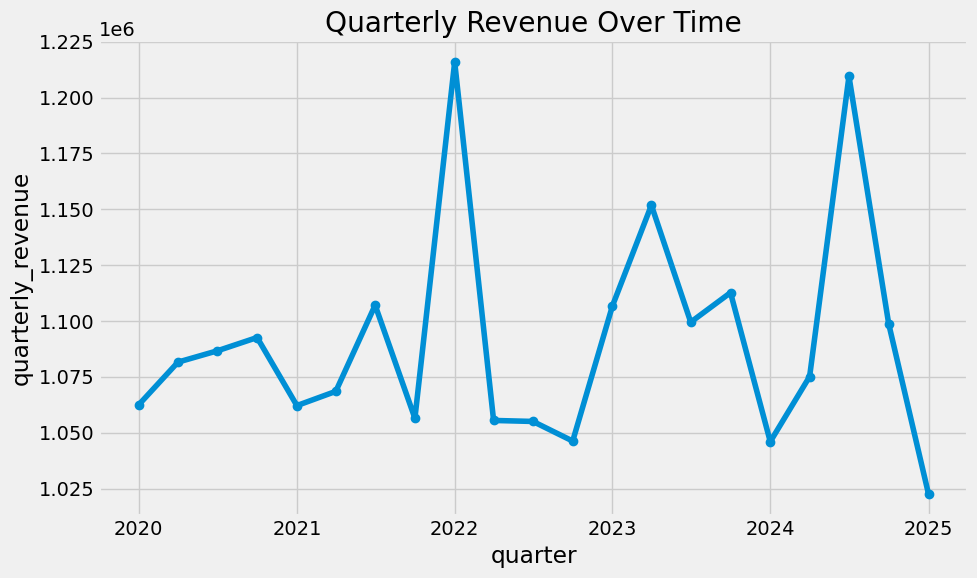

In [59]:
# Plot the time series line chart
plt.figure(figsize=(10, 6))
plt.plot(quarterly_revenue['quarter'], quarterly_revenue['quarterly_revenue'], marker='o', linestyle='-')
plt.title('Quarterly Revenue Over Time')
plt.xlabel('quarter')
plt.ylabel('quarterly_revenue')
plt.grid(True)
plt.tight_layout()
plt.show()

### 2. Subsetting, wrangling, and cleaning time-series data


In [12]:
# Step 1: Create a datetime column representing the first day of each month
df2['month_start'] = pd.to_datetime(df2['year'].astype(str) + '-' + df2['month'].astype(str).str.zfill(2) + '-01')



In [13]:
# Step 2: Group by this new date column and sum revenue
monthly_revenue = df2.groupby('month_start')['revenue'].sum().reset_index()

In [14]:
# Step 3: Rename columns for clarity
monthly_revenue.rename(columns={'month_start': 'Month', 'revenue': 'Monthly_Revenue'}, inplace=True)

In [15]:
monthly_revenue

,Month,Monthly_Revenue
0,2020-01-01,290723.89
1,2020-02-01,355213.26
2,2020-03-01,416547.17
3,2020-04-01,326287.92
4,2020-05-01,333210.99
...,...,...
58,2024-11-01,329894.33
59,2024-12-01,446728.99
60,2025-01-01,304965.15
61,2025-02-01,341768.25


In [16]:
# Renaming the columns from Month to date and ensuring dateline format

# Rename the column
monthly_revenue.rename(columns={'Month': 'date'}, inplace=True)

# Ensure it's in datetime format
monthly_revenue['date'] = pd.to_datetime(monthly_revenue['date'])


In [17]:
# Renaming the column from Monthly_Revenue to monthly_rev

# Rename the column
monthly_revenue.rename(columns={'Monthly_Revenue': 'monthly_rev'}, inplace=True)

In [18]:
monthly_revenue

,date,monthly_rev
0,2020-01-01,290723.89
1,2020-02-01,355213.26
2,2020-03-01,416547.17
3,2020-04-01,326287.92
4,2020-05-01,333210.99
...,...,...
58,2024-11-01,329894.33
59,2024-12-01,446728.99
60,2025-01-01,304965.15
61,2025-02-01,341768.25


<Figure size 1000x600 with 0 Axes>

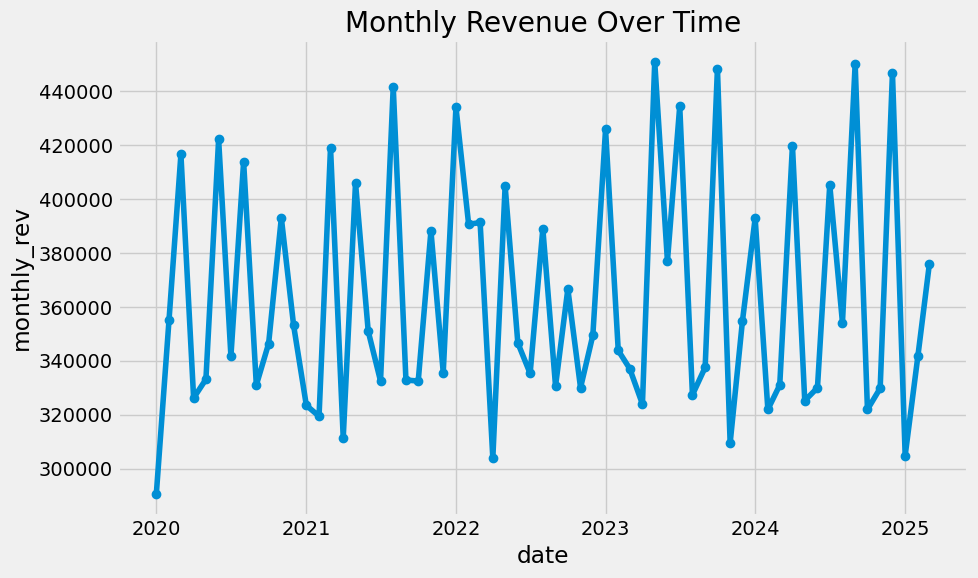

In [69]:
# Plot the time series line chart

plt.figure(figsize=(10, 6))
plt.plot(monthly_revenue['date'], monthly_revenue['monthly_rev'], marker='o', linestyle='-')
plt.title('Monthly Revenue Over Time')
plt.xlabel('date')
plt.ylabel('monthly_rev')
plt.grid(True)
plt.tight_layout()
plt.show()

In [20]:
monthly_revenue = monthly_revenue.set_index('date')

In [21]:
monthly_revenue


,monthly_rev
date,
2020-01-01,290723.89
2020-02-01,355213.26
2020-03-01,416547.17
2020-04-01,326287.92
2020-05-01,333210.99
...,...
2024-11-01,329894.33
2024-12-01,446728.99
2025-01-01,304965.15


### 3. Time-series analysis: decomposition

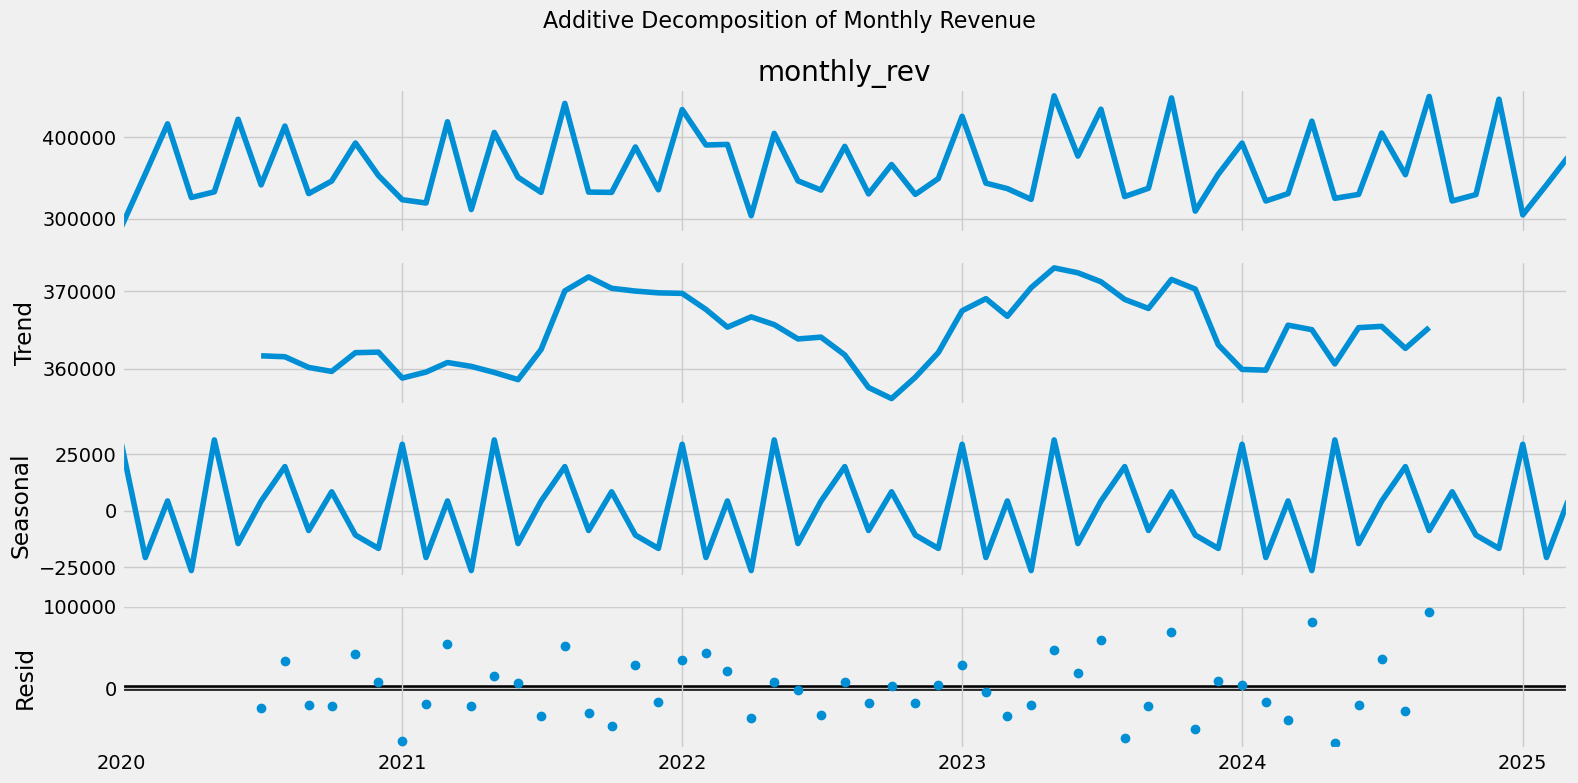

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Decompose the time series
result = seasonal_decompose(monthly_revenue['monthly_rev'], model='additive', period=12)

# Plot with wider layout
plt.rcParams.update({'figure.figsize': (16, 8)})  
result.plot()
plt.suptitle('Additive Decomposition of Monthly Revenue', fontsize=16)
plt.tight_layout()
plt.show()

### 4. Testing for stationarity

In [28]:
from statsmodels.tsa.stattools import adfuller

# Run ADF test on the monthly revenue series
result = adfuller(monthly_revenue['monthly_rev'])

# Extract and print results
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:")
for key, value in result[4].items():
    print(f"   {key}: {value}")

ADF Statistic: -9.344468774645264
p-value: 8.620483914993048e-16
Critical Values:
   1%: -3.542412746661615
   5%: -2.910236235808284
   10%: -2.5927445767266866


##### p > 0.05 so we can conclude that the data series is very non-stationary.

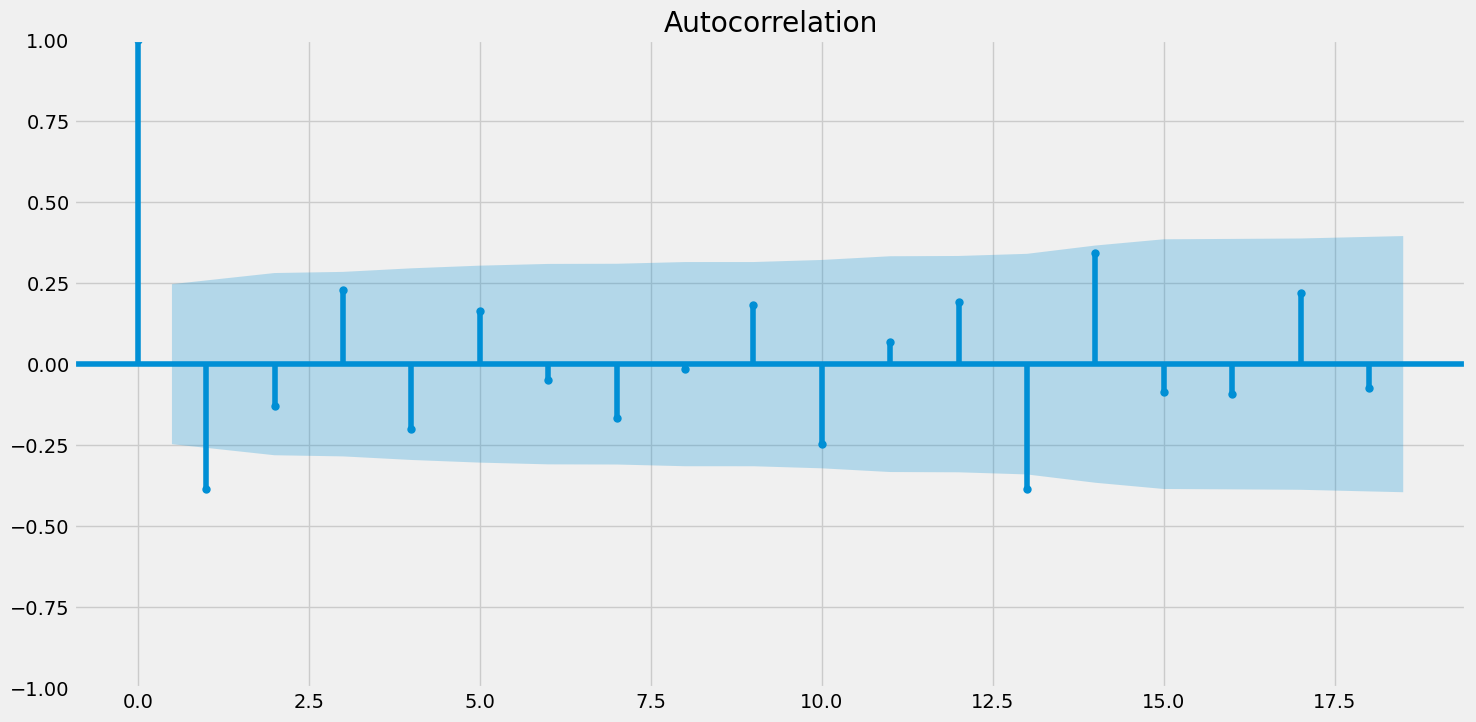

In [34]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(monthly_revenue)
plt.show()

### 5. Stationarizing the data

In [32]:
# Differencing

diff_series = monthly_revenue['monthly_rev'].diff().dropna()

In [31]:
diff_series.head()

date
2020-02-01    64489.37
2020-03-01    61333.91
2020-04-01   -90259.25
2020-05-01     6923.07
2020-06-01    88902.86
Name: monthly_rev, dtype: float64

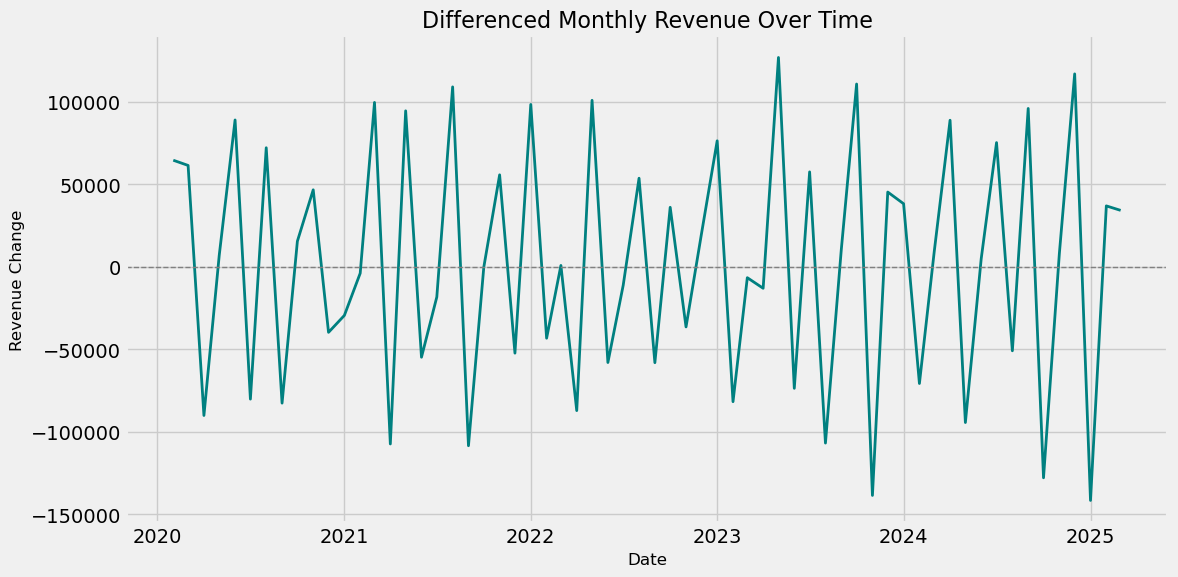

In [33]:
import matplotlib.pyplot as plt

# Create the line chart
plt.figure(figsize=(12, 6))
plt.plot(diff_series, color='teal', linewidth=2)

# Add titles and labels
plt.title('Differenced Monthly Revenue Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Revenue Change', fontsize=12)
plt.grid(True)

# Optional: Add a horizontal line at y=0 for reference
plt.axhline(0, color='gray', linestyle='--', linewidth=1)

plt.tight_layout()
plt.show()

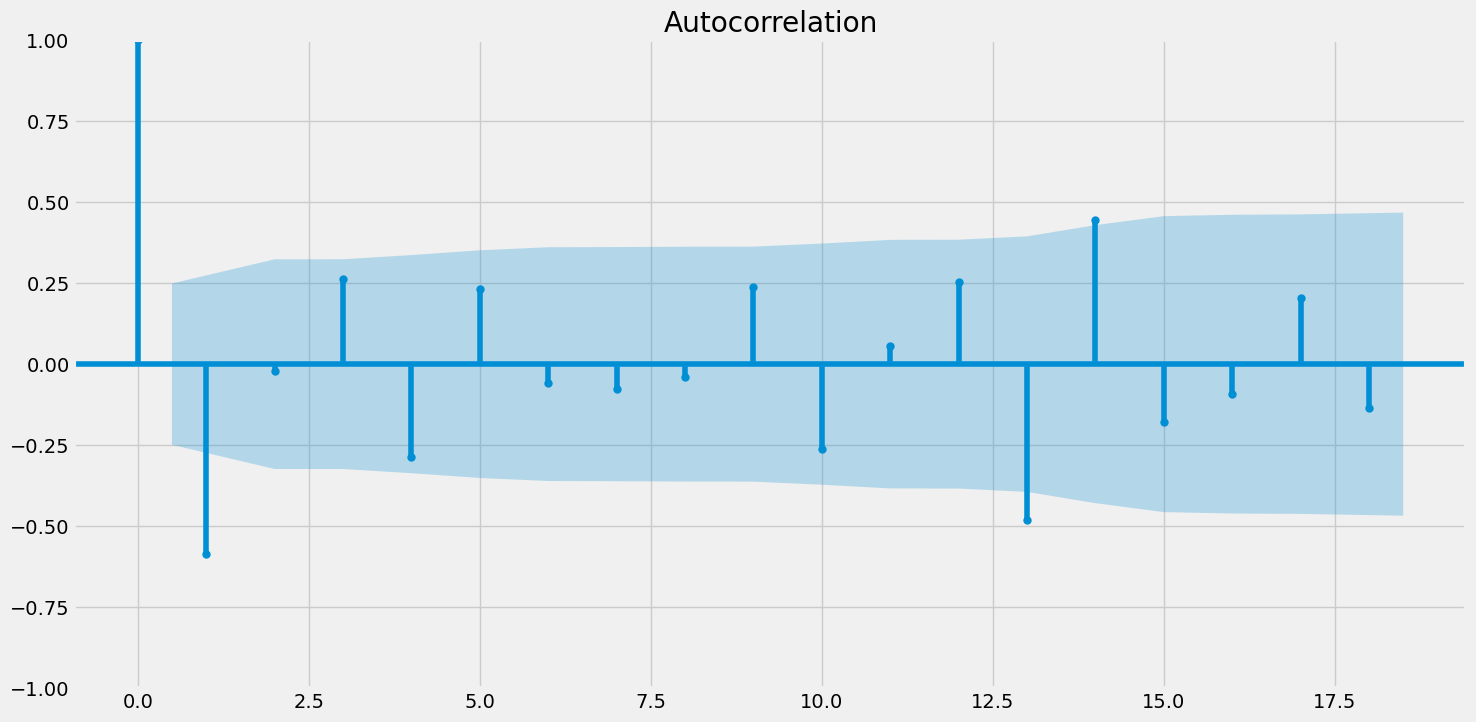

In [36]:
plot_acf(diff_series)
plt.show()